## Importing Libraries

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
os.environ["TF_XLA_FLAGS"] = "--tf_xla_enable_xla_devices=false"
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Test set Image Processing

In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'Valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 8850 files belonging to 4 classes.
['Corynespora', 'Healthy', 'Oidium', 'Pestalotiopsis']


## Loading Model

In [3]:
model = tf.keras.models.load_model('trained_model.keras')

/opt/anaconda3/envs/tf-macos/lib/python3.9/site-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 22 variables whereas the saved optimizer has 42 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,065,674 (26.95 MB)

 Trainable params: 3,532,836 (13.48 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,532,838 (13.48 MB)

### Visualizing Single Image of the test set

In [5]:
import numpy as np, cv2, tensorflow as tf

print("NumPy:", np.__version__)
print("OpenCV:", cv2.__version__)
print("TensorFlow:", tf.__version__)



NumPy: 1.26.4
OpenCV: 4.9.0
TensorFlow: 2.16.2


<function matplotlib.pyplot.show(close=None, block=None)>

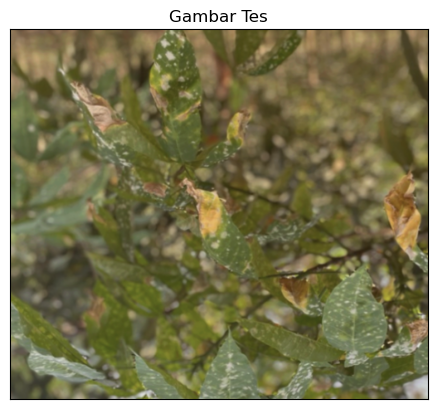

In [6]:
import cv2
image_path = "Test/RubberOidium4.png"
# Membaca gambar
img = cv2.imread(image_path)
# mengubah ke format RGB dari BGR
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# menampilkan gambar
plt.imshow(img)
plt.title("Gambar Tes")
plt.xticks([])
plt.yticks([])
plt. show

## Testing Model

In [7]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_array = tf.keras.preprocessing.image.img_to_array(image)
input_array = np.array([input_array]) #Mengubah satu gambar ke satu batch
print (input_array.shape)


(1, 128, 128, 3)


In [8]:
prediction = model.predict(input_array)
prediction,prediction.shape

I0000 00:00:1758685222.922823 5377197 service.cc:145] XLA service 0x600002aea900 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758685222.922876 5377197 service.cc:153]   StreamExecutor device (0): Host, Default Version
2025-09-24 10:40:22.952369: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


I0000 00:00:1758685223.209257 5377197 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


(array([[1.3163477e-06, 1.1838808e-01, 8.8116807e-01, 4.4258515e-04]],
       dtype=float32),
 (1, 4))

In [9]:
result_index = np.argmax(prediction) #return indeks dari elemen maksimum
print(result_index)

2


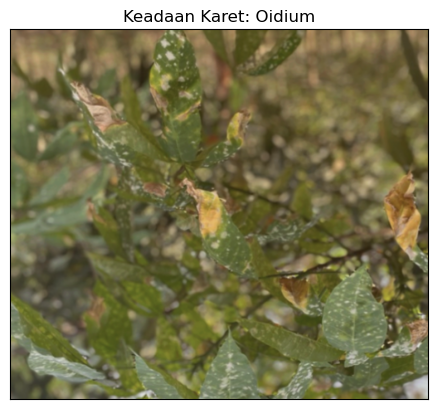

In [11]:
# Menampilkan prediksi penyakit
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Keadaan Karet: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()